In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score


#Read and Preprocess the data

In [2]:
data=pd.read_csv("/content/forestfires (1).csv")

In [3]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data.iloc[:, 0] = labelencoder.fit_transform(data.iloc[:,0])
data.iloc[:, 1] = labelencoder.fit_transform(data.iloc[:,1])
data.iloc[:, -1] = labelencoder.fit_transform(data.iloc[:,-1])


<ipython-input-4-1b6f6f12c071>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, 0] = labelencoder.fit_transform(data.iloc[:,0])
<ipython-input-4-1b6f6f12c071>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, 1] = labelencoder.fit_transform(data.iloc[:,1])
<ipython-input-4-1b6f6f12c071>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns a

In [5]:
data.head(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
5,1,3,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,1
6,1,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,1
7,1,1,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,...,0,0,0,0,0,0,0,0,0,1
8,11,5,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,...,0,0,0,0,0,0,0,0,1,1
9,11,2,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,0,0,0,0,0,1,1


In [8]:
columns=["dayfri","daymon","daysat","daysun","daythu", "daytue", "daywed", "monthapr","monthaug","monthdec",
"monthfeb",
"monthjan",
"monthjul",
"monthjun",
'monthmar',
'monthmay',
'monthnov',
'monthoct',
'monthsep' ]

In [9]:
data.drop(columns=columns, inplace=True)

In [10]:
data.shape

(517, 12)

In [11]:
data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int64  
 1   day            517 non-null    int64  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 48.6 KB


In [13]:
data.value_counts

<bound method DataFrame.value_counts of      month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
0        7    0  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00   
1       10    5  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00   
2       10    2  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00   
3        7    0  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00   
4        7    3  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00   
..     ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...   
512      1    3  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44   
513      1    3  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29   
514      1    3  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16   
515      1    2  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00   
516      9    5  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00   

     size_category  
0                1  
1                1  
2                1  
3                1  
4                1  
..             ...  
512              0  
513              0  
514              0  
515              1  
516              1  

[517 rows x 12 columns]>

In [14]:
data.describe()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,5.758221,2.736944,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.731141
std,4.373275,1.925061,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.443796
min,0.000000,0.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000
50%,6.000000,3.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,1.000000
75%,11.000000,4.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,1.000000
max,11.000000,6.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000


In [15]:
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'size_category'],
      dtype='object')

<Axes: >

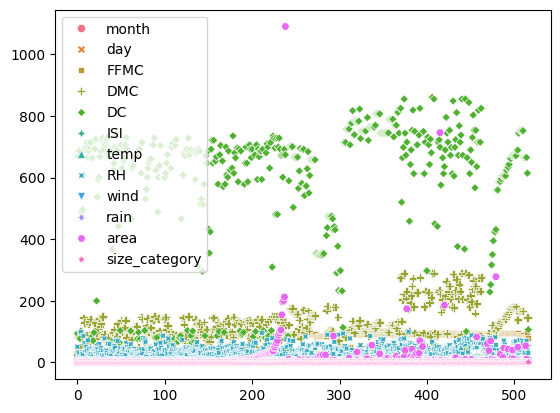

In [16]:
import seaborn as sns
sns.scatterplot(data=data)

In [17]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [18]:
X=(X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))

In [19]:
X

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0.636364,0.000000,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000
1,0.909091,0.833333,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000
2,0.909091,0.333333,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000
3,0.636364,0.000000,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000
4,0.636364,0.500000,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
512,0.090909,0.500000,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904
513,0.090909,0.500000,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769
514,0.090909,0.500000,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231
515,0.090909,0.333333,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

In [21]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((361, 11), (361,), (156, 11), (156,))

#MODEL

In [22]:
clf = SVC(kernel="linear",gamma=0.00001)
clf.fit(X_train , Y_train)


SVC(gamma=1e-05, kernel='linear')

In [23]:
pred = clf.predict(X_test)
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.03      0.05        38
           1       0.76      1.00      0.86       118

    accuracy                           0.76       156
   macro avg       0.88      0.51      0.46       156
weighted avg       0.82      0.76      0.67       156



For class 0:

Precision is very high (1.00), meaning almost all the predictions labeled as class 0 were correct.

Recall is low (0.03), indicating that only a small portion of the actual class 0 instances were correctly predicted.

F1-score is also low (0.05), which is expected given the low recall.
Support indicates there were 38 instances of class 0 in the dataset.

For class 1:

Precision is high (0.76), indicating that a significant portion of the predictions labeled as class 1 were correct.

Recall is very high (1.00), meaning almost all actual instances of class 1 were correctly predicted.

F1-score is also high (0.86), reflecting the balance between precision and recall.
Support indicates there were 118 instances of class 1 in the dataset.

#Grid Search CV

In [24]:
clf = SVC()
param_grid = [{'kernel':['rbf',"linear","polynomial","sigmoid"],'gamma':[0.001,0.01,0.1,1],'C':[0.1,1,10,11] }]
gsv = GridSearchCV(clf,param_grid,cv=5)
gsv.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_para

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 11], 'gamma': [0.001, 0.01, 0.1, 1],
                          'kernel': ['rbf', 'linear', 'polynomial',
                                     'sigmoid']}])

In [25]:
gsv.best_params_ , gsv.best_score_

({'C': 10, 'gamma': 1, 'kernel': 'rbf'}, 0.7562404870624049)

In [26]:
C = 10

In [27]:
clf = SVC(kernel="linear",C=C, gamma =0.001 ,class_weight="balanced")
clf.fit(X_train , Y_train)


SVC(C=10, class_weight='balanced', gamma=0.001, kernel='linear')

In [28]:
pred = clf.predict(X_test)
acc = accuracy_score(Y_test,pred) * 100
print("Accuracy =", acc)
print(classification_report(Y_test, pred))

Accuracy = 84.61538461538461
              precision    recall  f1-score   support

           0       1.00      0.37      0.54        38
           1       0.83      1.00      0.91       118

    accuracy                           0.85       156
   macro avg       0.92      0.68      0.72       156
weighted avg       0.87      0.85      0.82       156



Accuracy: The overall accuracy of the model is approximately 84.62%, meaning that around 84.62% of the predictions were correct.

For class 0:

Precision is very high (1.00), indicating that all the predictions labeled as class 0 were correct.

Recall is relatively low (0.37), suggesting that only about 37% of the actual instances of class 0 were correctly predicted.

F1-score is moderate (0.54), balancing precision and recall.
Support indicates there were 38 instances of class 0 in the dataset.

For class 1:

Precision is high (0.83), indicating that a significant portion of the predictions labeled as class 1 were correct.

Recall is very high (1.00), meaning almost all actual instances of class 1 were correctly predicted.

F1-score is also high (0.91), reflecting the balance between precision and recall.
Support indicates there were 118 instances of class 1 in the dataset.

In [29]:
confusion_matrix(Y_test,pred)

array([[ 14,  24],
       [  0, 118]])

True Negatives (TN): 14

False Positives (FP): 24

False Negatives (FN): 0

True Positives (TP): 118

This confusion matrix suggests that the model performed well in terms of correctly classifying negative instances (TN) and positive instances (TP). However, it misclassified 24 instances as positive (FP) when they were actually negative. There were no instances incorrectly classified as negative (FN), indicating a high level of sensitivity or recall.

 Overall, the model seems to have high accuracy and precision, but the false positive rate should also be considered depending on the specific context of the problem.






